In [1]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline

In [2]:
df1 = pd.read_csv('/Users/Desktop/Senti Project/2019/pdp2019.csv')
df2 = pd.read_csv('/Users/Desktop/Senti Project/2019/apc2019.csv')

In [3]:
df1.head()

,Unnamed: 0,original_text,party,tidy_tweet,Subjectivity,Polarity,sentiment,sent
0,0,"#Nigeria: Caucus Meeting: APC, PDP Debate Alle...",PDP,"Nigeria: Caucus Meeting: APC, PDP Debate Alleg...",0.000000,0.000000,Neutral,0
1,1,Lindo dms pdp nmrl men 😍😍👈,PDP,Lindo dms pdp nmrl men 😍😍👈,0.000000,0.000000,Neutral,0
2,2,"Nigerians, do not deter on 2mrw weather condit...",PDP,"Nigerians, do not deter on 2mrw weather condit...",0.500000,-0.488281,Negative,-1
3,3,"#NigeriaDecide Finally, I’m calling on the goo...",PDP,"NigeriaDecide Finally, I’m calling on the good...",0.766667,0.366667,Positive,1
4,4,KILL THOSE TRYING TO KILL DEMOCRACY As expecte...,PDP,KILL THOSE TRYING TO KILL DEMOCRACY As expecte...,0.400000,-0.100000,Negative,-1


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40345 entries, 0 to 40344
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     40345 non-null  int64  
 1   original_text  40131 non-null  object 
 2   party          40345 non-null  object 
 3   tidy_tweet     40018 non-null  object 
 4   Subjectivity   40345 non-null  float64
 5   Polarity       40345 non-null  float64
 6   sentiment      40345 non-null  object 
 7   sent           40345 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 2.5+ MB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30187 entries, 0 to 30186
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     30187 non-null  int64  
 1   original_text  30008 non-null  object 
 2   party          30187 non-null  object 
 3   tidy_tweet     29924 non-null  object 
 4   Subjectivity   30187 non-null  float64
 5   Polarity       30187 non-null  float64
 6   sentiment      30187 non-null  object 
 7   sent           30187 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 1.8+ MB


In [6]:
df = df1.append(df2, ignore_index=True)

In [7]:
df.head()

,Unnamed: 0,original_text,party,tidy_tweet,Subjectivity,Polarity,sentiment,sent
0,0,"#Nigeria: Caucus Meeting: APC, PDP Debate Alle...",PDP,"Nigeria: Caucus Meeting: APC, PDP Debate Alleg...",0.000000,0.000000,Neutral,0
1,1,Lindo dms pdp nmrl men 😍😍👈,PDP,Lindo dms pdp nmrl men 😍😍👈,0.000000,0.000000,Neutral,0
2,2,"Nigerians, do not deter on 2mrw weather condit...",PDP,"Nigerians, do not deter on 2mrw weather condit...",0.500000,-0.488281,Negative,-1
3,3,"#NigeriaDecide Finally, I’m calling on the goo...",PDP,"NigeriaDecide Finally, I’m calling on the good...",0.766667,0.366667,Positive,1
4,4,KILL THOSE TRYING TO KILL DEMOCRACY As expecte...,PDP,KILL THOSE TRYING TO KILL DEMOCRACY As expecte...,0.400000,-0.100000,Negative,-1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70532 entries, 0 to 70531
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     70532 non-null  int64  
 1   original_text  70139 non-null  object 
 2   party          70532 non-null  object 
 3   tidy_tweet     69942 non-null  object 
 4   Subjectivity   70532 non-null  float64
 5   Polarity       70532 non-null  float64
 6   sentiment      70532 non-null  object 
 7   sent           70532 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.3+ MB


In [9]:
df['target'] = df['party'].factorize()[0]

In [10]:
df.head()

,Unnamed: 0,original_text,party,tidy_tweet,Subjectivity,Polarity,sentiment,sent,target
0,0,"#Nigeria: Caucus Meeting: APC, PDP Debate Alle...",PDP,"Nigeria: Caucus Meeting: APC, PDP Debate Alleg...",0.000000,0.000000,Neutral,0,0
1,1,Lindo dms pdp nmrl men 😍😍👈,PDP,Lindo dms pdp nmrl men 😍😍👈,0.000000,0.000000,Neutral,0,0
2,2,"Nigerians, do not deter on 2mrw weather condit...",PDP,"Nigerians, do not deter on 2mrw weather condit...",0.500000,-0.488281,Negative,-1,0
3,3,"#NigeriaDecide Finally, I’m calling on the goo...",PDP,"NigeriaDecide Finally, I’m calling on the good...",0.766667,0.366667,Positive,1,0
4,4,KILL THOSE TRYING TO KILL DEMOCRACY As expecte...,PDP,KILL THOSE TRYING TO KILL DEMOCRACY As expecte...,0.400000,-0.100000,Negative,-1,0


In [11]:
df['target'].value_counts()

0    40345
1    30187
Name: target, dtype: int64

### 0 = PDP
### 1 = APC

In [12]:
df.dtypes

Unnamed: 0         int64
original_text     object
party             object
tidy_tweet        object
Subjectivity     float64
Polarity         float64
sentiment         object
sent               int64
target             int64
dtype: object

In [13]:
df['tidy_tweet'] = df['tidy_tweet'].astype(str)

In [14]:
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [15]:
df.head()

,Unnamed: 0,original_text,party,tidy_tweet,Subjectivity,Polarity,sentiment,sent,target
0,0,"#Nigeria: Caucus Meeting: APC, PDP Debate Alle...",PDP,"Nigeria: Caucus Meeting: APC, Debate Allegatio...",0.000000,0.000000,Neutral,0,0
1,1,Lindo dms pdp nmrl men 😍😍👈,PDP,Lindo nmrl,0.000000,0.000000,Neutral,0,0
2,2,"Nigerians, do not deter on 2mrw weather condit...",PDP,"Nigerians, deter 2mrw weather condition. will ...",0.500000,-0.488281,Negative,-1,0
3,3,"#NigeriaDecide Finally, I’m calling on the goo...",PDP,"NigeriaDecide Finally, calling good people Nig...",0.766667,0.366667,Positive,1,0
4,4,KILL THOSE TRYING TO KILL DEMOCRACY As expecte...,PDP,"KILL THOSE TRYING KILL DEMOCRACY expected, pan...",0.400000,-0.100000,Negative,-1,0


In [16]:
tokenized_tweet = df['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [Nigeria:, Caucus, Meeting:, APC,, Debate, All...
1                                        [Lindo, nmrl]
2    [Nigerians,, deter, 2mrw, weather, condition.,...
3    [NigeriaDecide, Finally,, calling, good, peopl...
4    [KILL, THOSE, TRYING, KILL, DEMOCRACY, expecte...
Name: tidy_tweet, dtype: object

In [17]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [nigeria:, caucu, meeting:, apc,, debat, alleg...
1                                        [lindo, nmrl]
2    [nigerians,, deter, 2mrw, weather, condition.,...
3    [nigeriadecid, finally,, call, good, peopl, ni...
4    [kill, those, tri, kill, democraci, expected,,...
Name: tidy_tweet, dtype: object

In [18]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df['tidy_tweet'] = tokenized_tweet

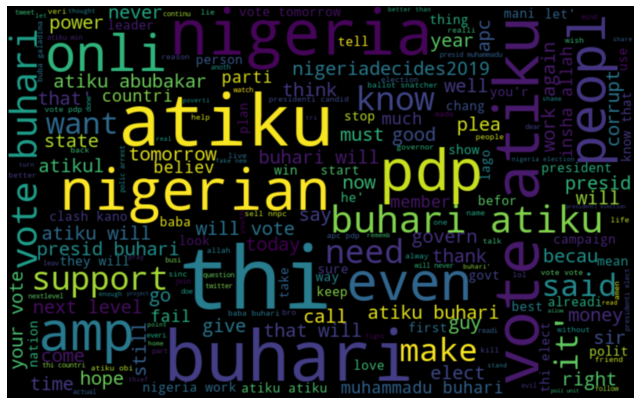

In [19]:
all_words = ' '.join([text for text in df['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 9))
plt.imshow(wordcloud, interpolation="bicubic")
plt.axis('off')
plt.show()

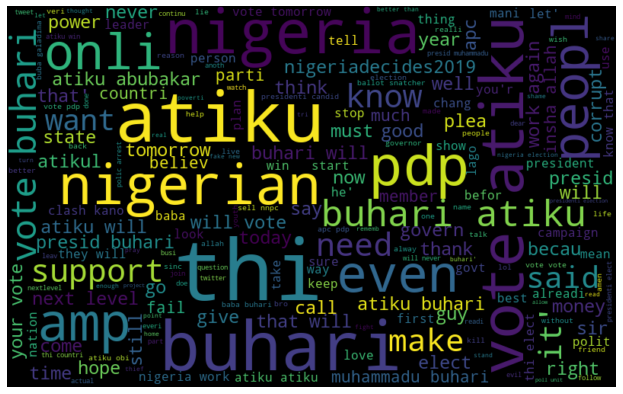

In [20]:
apc_words = ' '.join([text for text in df['tidy_tweet'][df['party'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

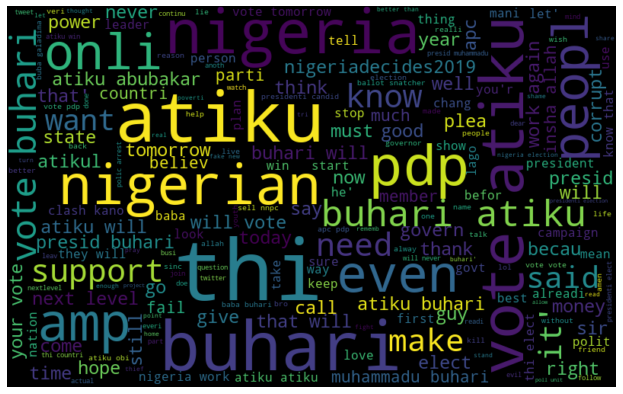

In [21]:
pdp_words = ' '.join([text for text in df['tidy_tweet'][df['party'] == 0]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [22]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [31]:
party_id_df = df[['target','party']].drop_duplicates().sort_values('target')

In [32]:
category_to_id = dict(party_id_df.values)
id_to_category = dict(party_id_df[['party', 'target']].values)

In [33]:
# Pick 5 random samples from the dataframe
df.sample(5, random_state=0)

,Unnamed: 0,original_text,party,tidy_tweet,Subjectivity,Polarity,sentiment,sent,target
59161,18816,@Ibstrategy,APC,,0.0000,0.0000,Neutral,0,1
4283,4283,"PDP will win kaduna this time, Lagos is 50/50,...",PDP,"will kaduna thi time, lago 50/50, kano 50/50 t...",0.4000,0.8000,Positive,1,0
30064,30064,Is it only Atiku and buhari are contesting for...,PDP,onli atiku buhari contest president? what abou...,0.6875,-0.0625,Negative,-1,0
36181,36181,Come and use my hand to vote @atiku or come st...,PDP,come hand vote come steal voter card vote hone...,0.9000,0.6000,Positive,1,0
64279,23934,Better pikins.. Won ti Japa. NextLevelNG,APC,better pikins.. japa. nextlevelng,0.5000,0.5000,Positive,1,1


In [34]:
# Create a new pandas dataframe "category_id_df", which only has unique Categories, also sorting this list in order of category_id values
party_df = df[['target', 'party']].drop_duplicates().sort_values('party')

In [35]:
party_df

,target,party
40345,1,APC
0,0,PDP


In [36]:
# Group the dataframe by categories and count items ( number of news articles) in each category
df.groupby('target').party.count()

target
0    40345
1    30187
Name: party, dtype: int64

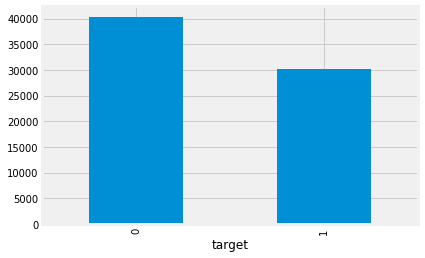

In [37]:
#Plot the distribution of party by category
df.groupby('target').party.count().plot.bar(ylim=0)

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=20, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.tidy_tweet).toarray() # Remaps the words in the 1490 articles in the text column of 
                                                  # data frame into features (superset of words) with an importance assigned 
                                                  # based on each words frequency in the document and across documents

labels = df.party 

In [39]:
features.shape

(70532, 5764)

In [40]:
# Remember the dictionary created to map party to a number ? 
category_to_id.items()

dict_items([(0, 'PDP'), (1, 'APC')])

In [41]:
# The sorted function Converts dictionary items into a (sorted) list. 
# In subsequent steps - We will use this list to iterate over the categories
sorted(category_to_id.items())

[(0, 'PDP'), (1, 'APC')]

In [42]:
# Use chi-square analysis to find corelation between features (importantce of words) and labels(news category) 
from sklearn.feature_selection import chi2

N = 2  # We are going to look for top 3 categories

#For each category, find words that are highly corelated to it
for target, party in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == party)                   # Do chi2 analyses of all items in this category
  indices = np.argsort(features_chi2[0])                                  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
  feature_names = np.array(tfidf.get_feature_names())[indices]            # Converts indices to feature names ( in increasing order of chi-squared stat values)
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         # List of single word features ( in increasing order of chi-squared stat values)
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]          # List for two-word features ( in increasing order of chi-squared stat values)
  print("# '{}':".format(target))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) # Print 3 unigrams with highest Chi squared stat
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:]))) # Print 3 bigrams with highest Chi squared stat

# '0':
  . Most correlated unigrams:
       . atiku
       . buhari
  . Most correlated bigrams:
       . vote atiku
       . vote buhari
# '1':
  . Most correlated unigrams:
       . atiku
       . buhari
  . Most correlated bigrams:
       . vote atiku
       . vote buhari


In [43]:
from sklearn.manifold import TSNE

# Sampling a subset of our dataset because t-SNE is computationally expensive
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)          # Randomly select 30 % of samples
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices]) # Array of all projected features of 30% of Randomly chosen samples

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

In [46]:
CV = 5  # Cross Validate with 5 different folds of 20% data ( 80-20 split with 5 folds )

#Create a data frame that will store the results for all 5 trials of the 3 different models
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = [] # Initially all entries are empty

In [47]:
#For each Algorithm 
for model in models:
  model_name = model.__class__.__name__
  # create 5 models with different 20% test sets, and store their accuracies
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  # Append all 5 accuracies into the entries list ( after all 3 models are run, there will be 3x5 = 15 entries)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

In [48]:
# Store the entries into the results dataframe and name its columns    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

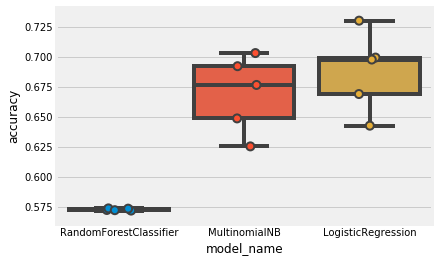

In [49]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [50]:
# Mean accuracy of each algorithm
cv_df.groupby('model_name').accuracy.mean()

model_name
LogisticRegression        0.687632
MultinomialNB             0.669087
RandomForestClassifier    0.572832
Name: accuracy, dtype: float64

In [51]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.571986
1,RandomForestClassifier,1,0.572482
2,RandomForestClassifier,2,0.573798
3,RandomForestClassifier,3,0.572310
4,RandomForestClassifier,4,0.573586
5,MultinomialNB,0,0.625363
6,MultinomialNB,1,0.648614
7,MultinomialNB,2,0.702963
8,MultinomialNB,3,0.676450
9,MultinomialNB,4,0.692046


In [52]:
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state=0)

#Split Data 
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)

#Train Algorithm
model.fit(X_train, y_train)

# Make Predictions
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

Text(0.5, 18.5, 'Predicted')

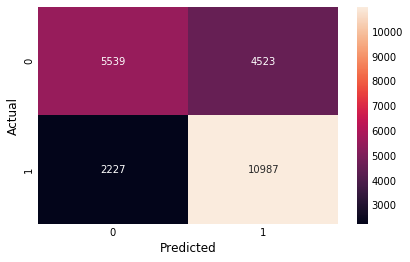

In [53]:
#Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=party_id_df.target.values, yticklabels=party_id_df.target.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [54]:
model.fit(features, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
texts = ["Who should we vote for; I prefer","I give it to @mbuhari","This election will be peaceful" ]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

"Who should we vote for; I prefer"
  - Predicted as: '0'

"I give it to @mbuhari"
  - Predicted as: '1'

"This election will be peaceful"
  - Predicted as: '0'

